Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
sns.set()

Loading data for the good farms

In [2]:
milk = pd.read_csv("AllMilkingsDaily_Weather.csv")
milk["Timestamp"] = pd.to_datetime(milk["Timestamp"])
milk = milk.set_index("Timestamp")

milk = milk[milk["FarmName_Pseudo"].isin(["ad0a39f5", "752efd72", "5c06d92d", "540275a1", "a624fb9a", "f454e660", "ab18b151"])]

And replacing the names

In [3]:
rDict = {"a624fb9a": "Farm 1",
    "ab18b151": "Farm 2",
    "540275a1": "Farm 3",
    "5b581702": "Farm 4",
    "5c06d92d": "Farm 5",
    "a756bc39": "Farm 6",
    "ad0a39f5": "Farm 7",
    "752efd72": "Farm 8",
    "f454e660": "Farm 9"}
    
milk = milk.replace({"FarmName_Pseudo": rDict})

farmNames = milk["FarmName_Pseudo"].unique()

Plotting the autocorrelation for weather parameters

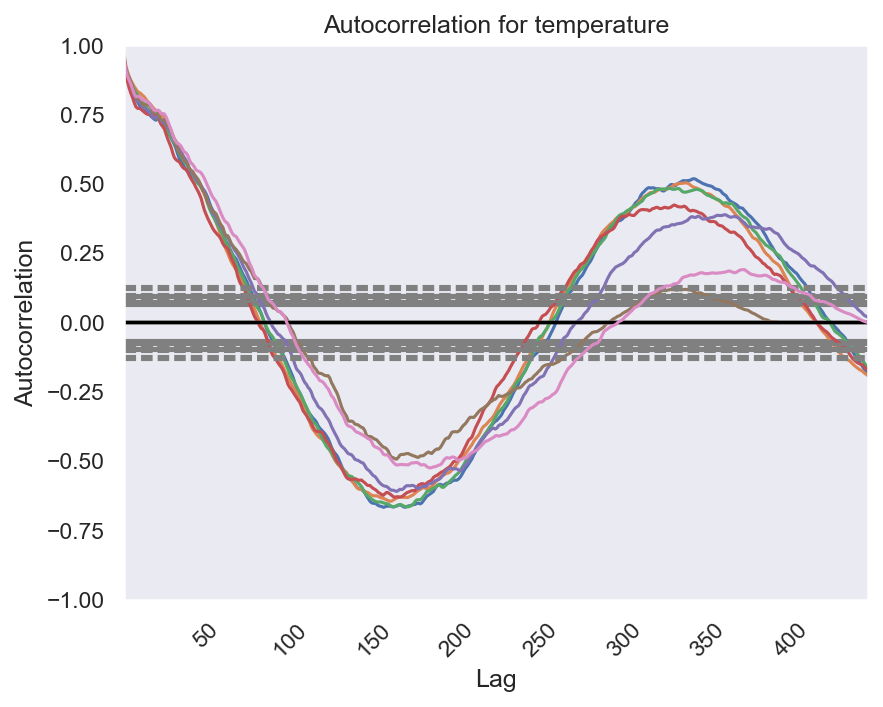

In [4]:
for name in farmNames:
    farm = milk[milk["FarmName_Pseudo"] == name]
    farm = farm.groupby([farm.index.date]).agg({'DailyYield': 'mean', 'T_C_mean': 'mean'})

    pd.plotting.autocorrelation_plot(farm["T_C_mean"]).plot()
    plt.title("Autocorrelation for temperature")
    plt.xticks(rotation = 45)
plt.show()


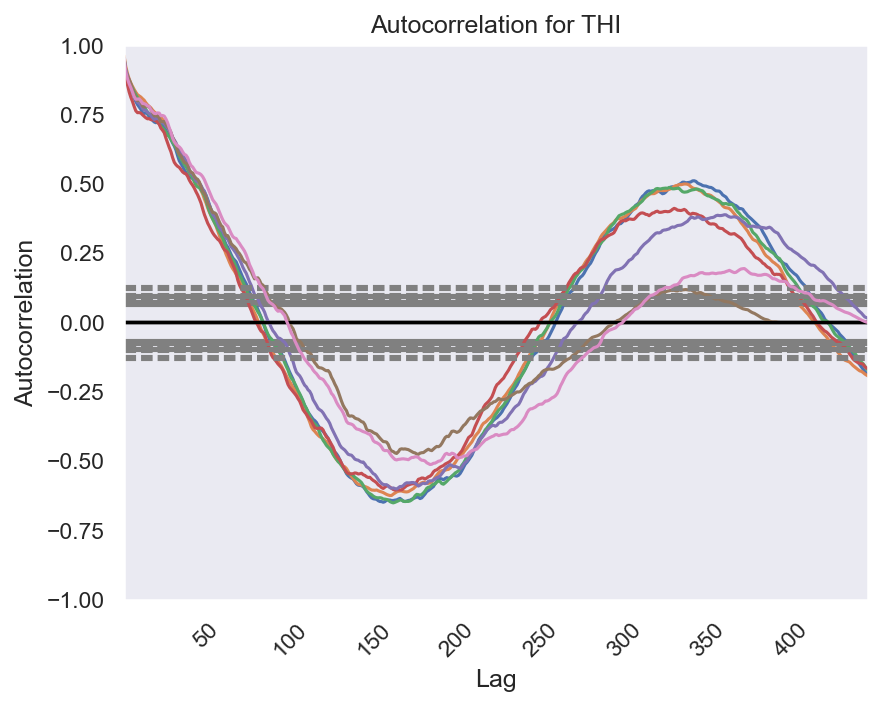

In [5]:
for name in farmNames:
    farm = milk[milk["FarmName_Pseudo"] == name]
    farm = farm.groupby([farm.index.date]).agg({'DailyYield': 'mean', 'THI_mean': 'mean'})

    pd.plotting.autocorrelation_plot(farm["THI_mean"]).plot()
    plt.title("Autocorrelation for THI")
    plt.xticks(rotation = 45)
plt.show()

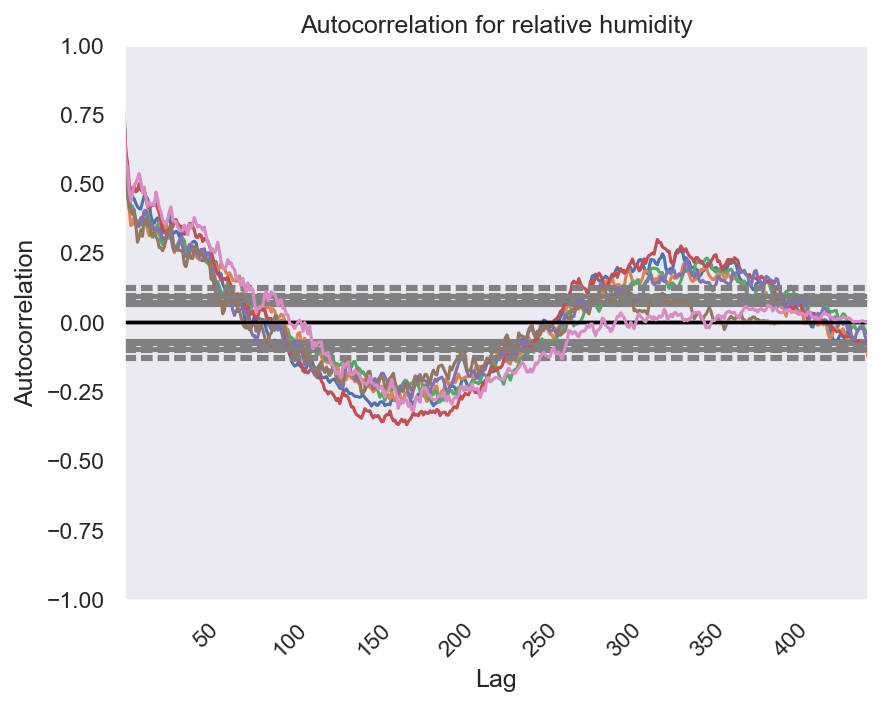

In [6]:
for name in farmNames:
    farm = milk[milk["FarmName_Pseudo"] == name]
    farm = farm.groupby([farm.index.date]).agg({'DailyYield': 'mean', 'r_sfc_mean': 'mean'})

    pd.plotting.autocorrelation_plot(farm["r_sfc_mean"]).plot()
    plt.title("Autocorrelation for relative humidity")
    plt.xticks(rotation = 45)
plt.show()

Plotting the autocorrelation for milk yield

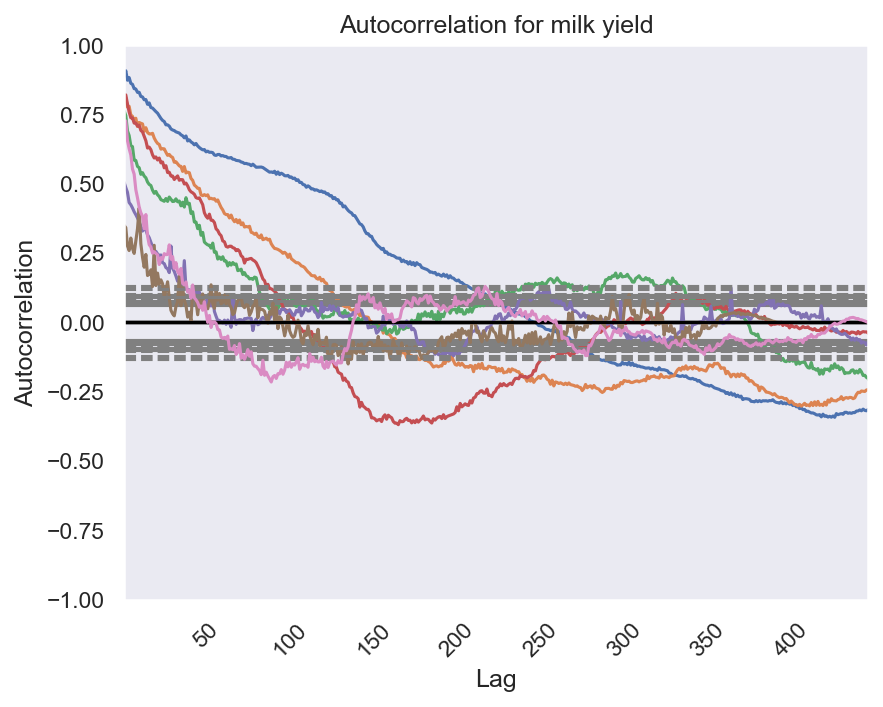

In [7]:
for name in farmNames:
    farm = milk[milk["FarmName_Pseudo"] == name]
    farm = farm.groupby([farm.index.date]).agg({'DailyYield': 'mean', 'r_sfc_mean': 'mean'})

    pd.plotting.autocorrelation_plot(farm["DailyYield"]).plot()
    plt.title("Autocorrelation for milk yield")
    plt.xticks(rotation = 45)
plt.show()

Conclusion:
1. The autocorrelation for the weather parameters show a clear peak around 365 days, which is expected.
2. The autocorrelation for milk yield is very different for different farms, which likely explains the differences between the farms found using "simpleCorrelation.ipynb"

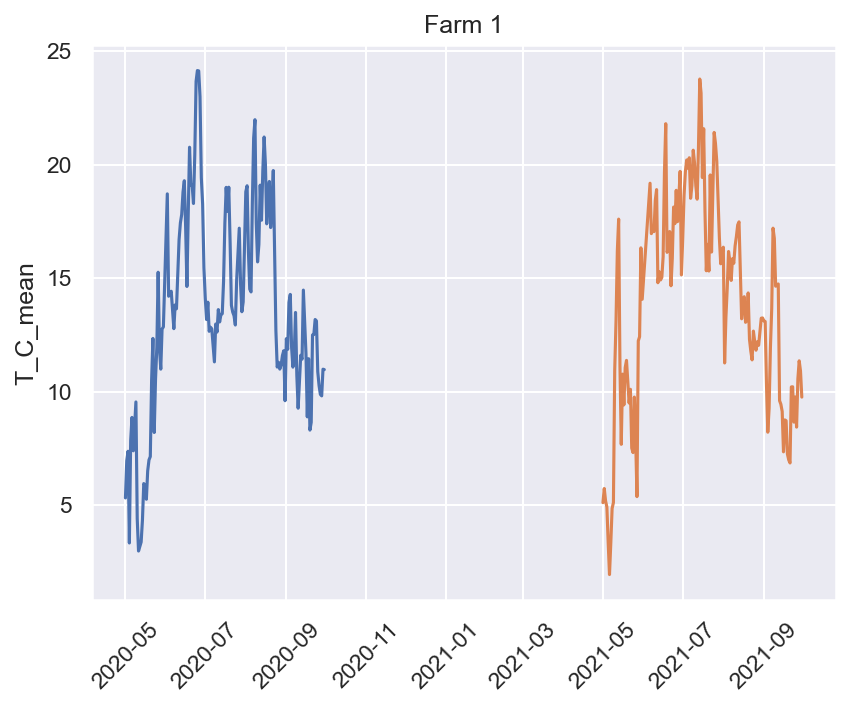

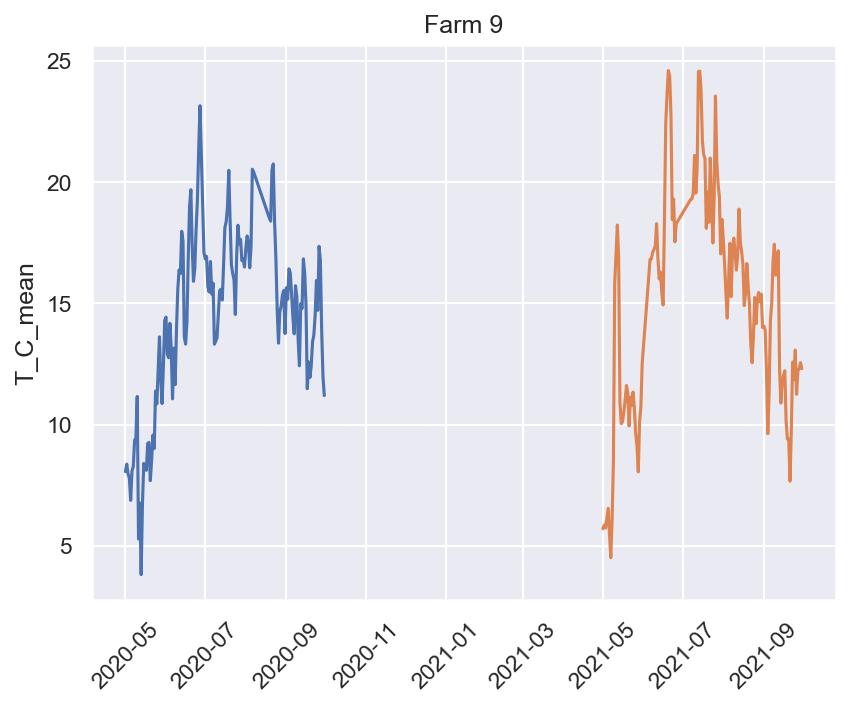

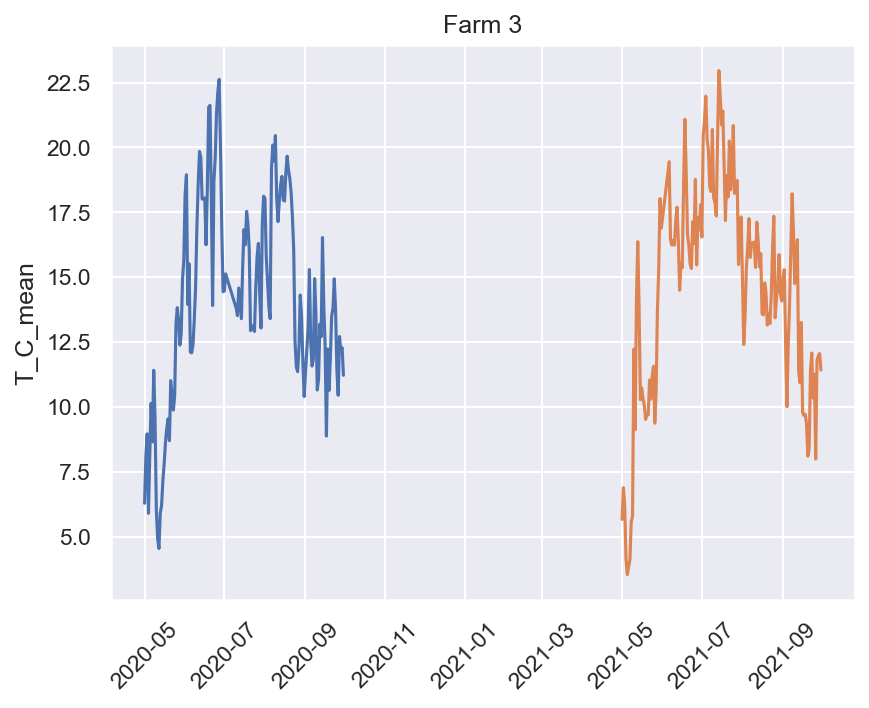

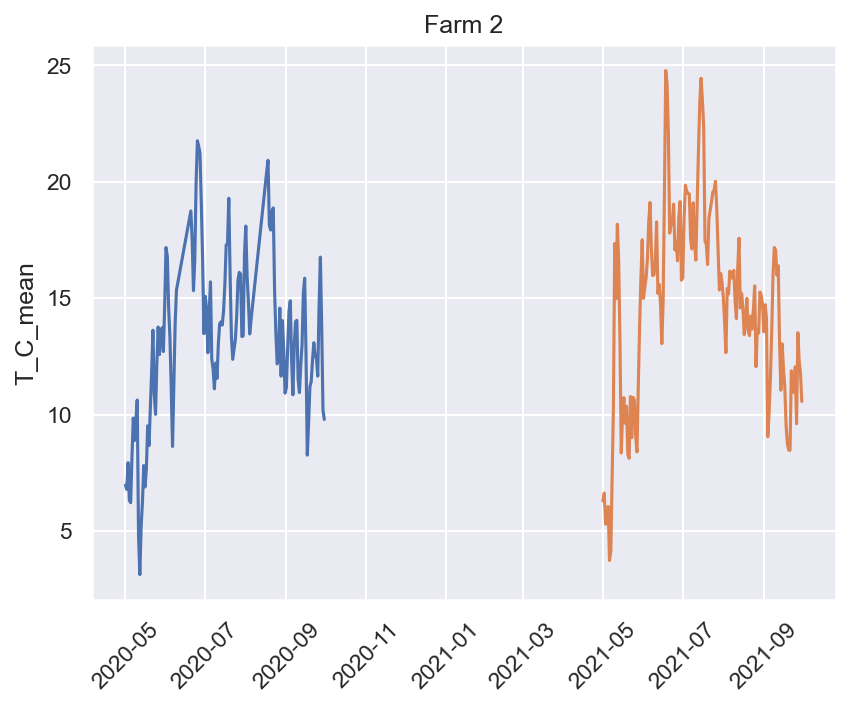

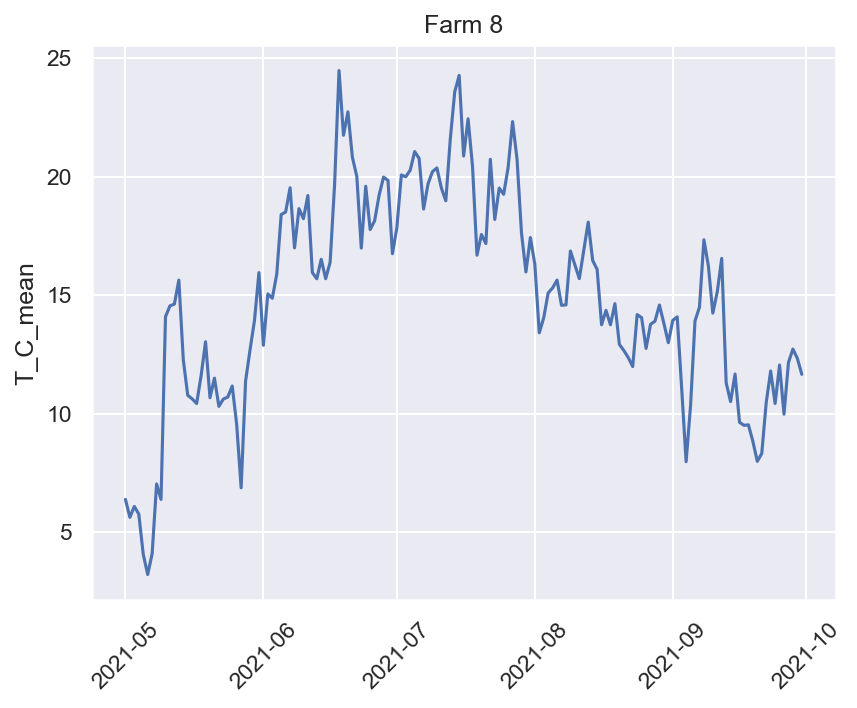

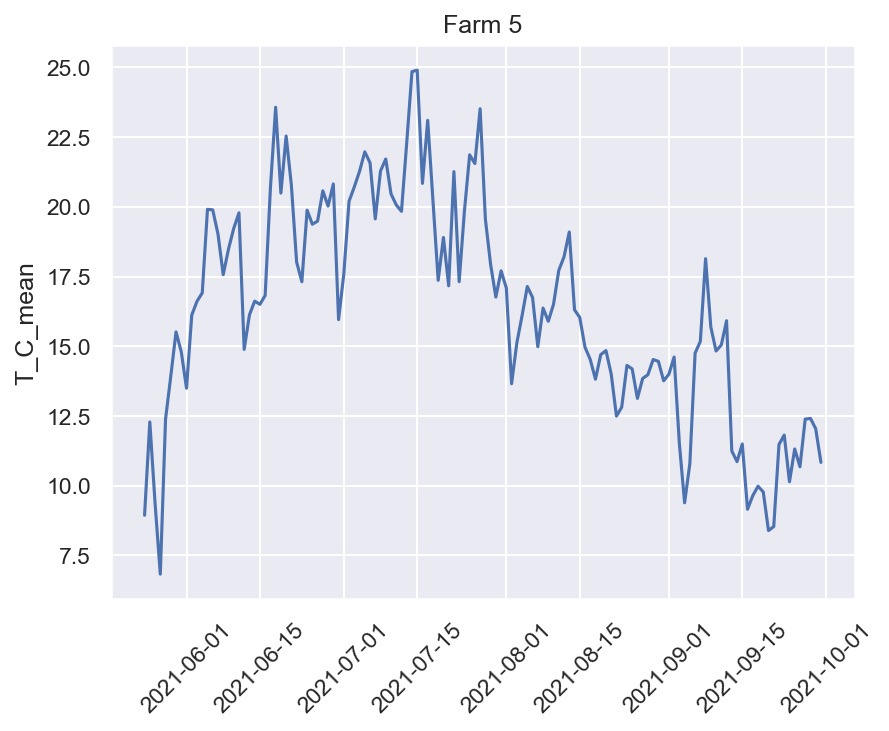

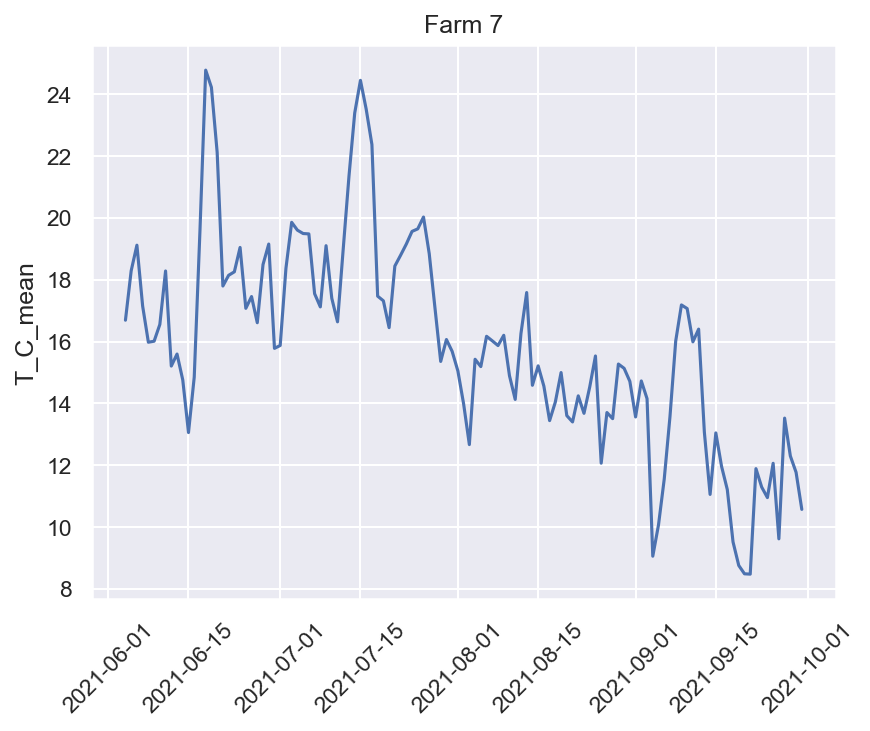

In [22]:
for name in farmNames:
    farm = milk[milk["FarmName_Pseudo"] == name]
    farm = farm.groupby([farm.index.date]).agg({'DailyYield': 'mean', 'T_C_mean': 'mean'})
    startdate = pd.to_datetime("2020-05-01").date()
    enddate = pd.to_datetime("2020-09-30").date()
    farm0 = farm[startdate:enddate]
    sns.lineplot(farm0["T_C_mean"])
    startdate = pd.to_datetime("2021-05-01").date()
    enddate = pd.to_datetime("2021-09-30").date()
    farm1 = farm[startdate:enddate]
    sns.lineplot(farm1["T_C_mean"])
    plt.xticks(rotation = 45)
    plt.title(name)
    plt.show()
    